<a href="https://colab.research.google.com/github/Sapire2003/Project-Portfolio/blob/Data-Analysis/Tokens_and_Tags.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC-206: Text Analytics
# Noah Sapire


## Assignment 6: A pain in the neck?

In this assignment you'll be practicing with the concepts covered in class. DO NOT use code from the internet.

There are NO prizes for short, concise code where readability is impacted. However you're free to use concepts and code I use in class.

ALWAYS print nicely.

**BEFORE HANDING IN THIS NOTEBOOK - REMOVE MY EXAMPLE CODE AND GRAPHS. ONLY SUBMIT CODE THAT ANSWERS MY QUESTIONS.**

In this notebook, we're going to use a bunch of techniques demonstrated in class, to try to make sense of the novel Dracula, by Bram Stoker.

I'm going to focus on what I want the outcome to be, and not on how you achieve it, although I will give you hints and suggestions, so read carefully.

Ultimately, I'm looking for THREE images.

1. A graph of interactions (who talks to who)
2. A line graph showing a culmulative count of the top people in the novel - which sentences they appear in
3. A word cloud. Shaped like a bat.

While creating these, I ask you to print out certain information. It's often the case that this information can help you create the images I want.

I *strongly* suggest you read through all of the assignment, to see what's needed. It's just possible early decisions about things like data types will make this assignment easier - or harder.

### Part 1: Look who's talking

We're going to generate a graph, just like we did with the Doctor Who scripts. Only this time, we have NO idea who the main characters are - there's no handy markup we can use to extract people.

So we'll do it the hard way. We have previously seen that if we collect *bigrams of proper nouns*, we often end up with people's names.

We're going to get some wrong, and miss others completely, but let's see if we get anything at all useful.

My tips:
* Access the Dracula text at: [https://www.gutenberg.org/cache/epub/345/pg345.txt](http://www.gutenberg.org/cache/epub/345/pg345.txt) online
* You'll need tokens
* And POS tags
* Perform any required cleaning (think about the source of the text)
* And extract things that are singular proper nouns
* Print out how many UNIQUE bigrams of those proper nouns there are
* **Here's the first problem**
  * You should see that there are a lot of unique bigrams and not all of them are people
  * We need to *filter* the bigrams, to have a best shot at extracting real people
  * We'll assume that bigrams that occur more often are possibly real things - so we'll use the top 100 bigrams (those that occur the 100 times the most often) as our filter
* Here is one roadmap:
  1. Make bigrams from the entire text
  2. Go through the bigrams in the text one at a time
  3. Append it to an list of people, only if it's a bigram in our top 100.
  4. Remember that for the graph (below) we need the interactions to ultimately be a list of strings, and not tuples (i.e. we want ['jonathan harker', 'miss mina'....])

* It should be really obvious that there are flaws here - just because one name appears after another name doesn't MEAN there was an interaction, but maybe it will give us an *impression* of what's going on

* However you achieved it, you should now be able to generate an interaction graph, just like with Doctor Who
* Generate the graph of people who interact AT LEAST 8 times (this will also cut out some of the noise)
* Comment on the graph. You can look at the wikipedia page for the novel Dracula if you're not familiar with it, and see if the characters, and their interactions make sense.
* Are there any issues that you can spot in the graph? You may need to read the wikipedia page to help you.


In [ ]:
import pickle
from google.colab import drive
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.util import bigrams
from collections import Counter
import urllib.request
import string

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

import networkx as nx

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Do part 1 here
# I fully recommend breaking this up in to cells as appropriate (over doing it all in one cell)
fileName = "https://www.gutenberg.org/cache/epub/345/pg345.txt"
response = urllib.request.urlopen(fileName)
data = response.read()
text = data.decode('utf-8')

In [ ]:
start_script = text.find('Chapter III')
end_script = text.find('*** END')
realText = text[start_script+6:end_script]
sentences = sent_tokenize(realText)
for thing in string.punctuation:
  realText = realText.replace(thing,'')

In [ ]:
stop = set(stopwords.words('english'))

In [ ]:
tokens = word_tokenize(realText)

In [ ]:
pos_tags = nltk.pos_tag(tokens)
pnouns = [word for word, pos in pos_tags if pos == 'NNP' and not len(word) <= 2]

In [ ]:
noun_bigrams = list(bigrams(pnouns))
bigrams_list = [' '.join(bigram) for bigram in noun_bigrams]
bigram_count = Counter(bigrams_list)

top100 = [bigram for bigram, _ in bigram_count.most_common(100)]

conv = []
bigram1 = bigrams_list[0]
for bigram2 in bigrams_list[1:]:
  if bigram1 in top100 and bigram2 in top100:
    conv.append((bigram1, bigram2))
  bigram1 = bigram2

In [ ]:
conv_counter = Counter(conv)

In [ ]:
#NJW

import matplotlib.pyplot as plt

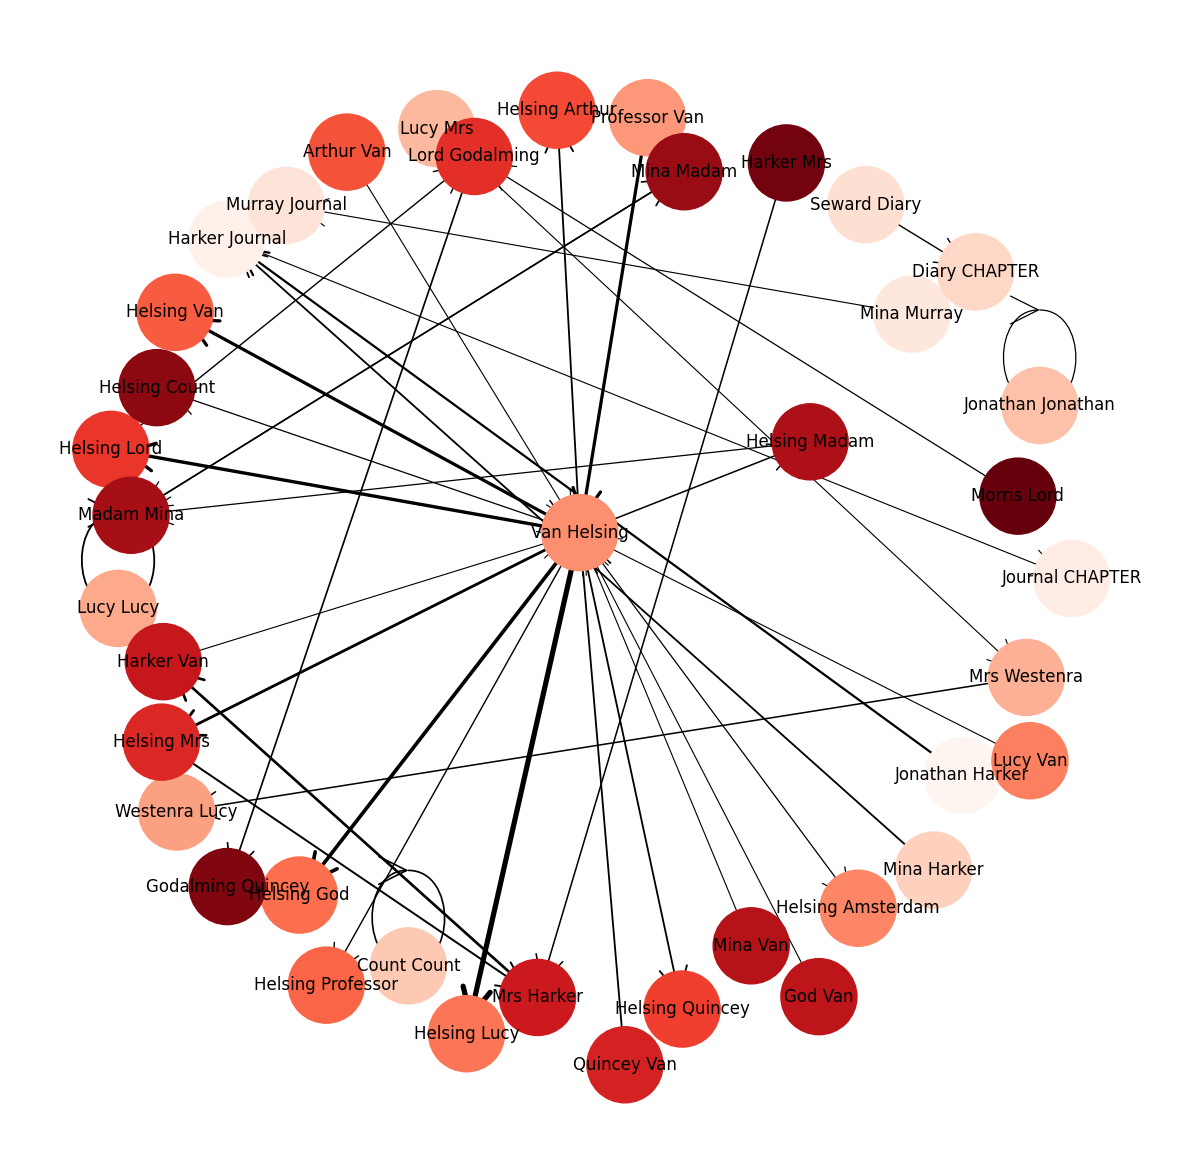

In [ ]:
g = nx.DiGraph()

edge_thick = []
vsum = 0
unique = []

for key,value in conv_counter.items():
  if value >= 8:
    name1,name2 = key
    unique.append(name1)
    g.add_edge(name1, name2, weight=1)
    edge_thick.append(value)
    vsum+= value

edge_thick2 = [(value/vsum)*50 for value in edge_thick]

pos = nx.spring_layout(g,k=2)

node_colors = range(len(g))
M = g.number_of_edges()

plt.figure(figsize=(15,15))
nodes = nx.draw_networkx_nodes(g,pos,node_size = 3000, node_color=node_colors, cmap=plt.cm.Reds)
edges = nx.draw_networkx_edges(g,pos,arrowstyle='->',arrowsize=50,edge_color='black', width=edge_thick2)

nx.draw_networkx_labels(g, pos)
ax = plt.gca()
ax.set_axis_off()

plt.show()

The graph does not make sense as some of them are not even character names.  Some are just titles such as Lord and "God" is not a character.  Another issue is that two word names get messed up such as Van Hellsing.  Additionally there is some repeats with characters talking to the same ones but the turn order is the other way around.

### Part 2: Count Dracula

I want to see a graph of who is mentioned when in the text. A line graph, that keeps count of the number of times a character is mentioned.

We'll focus on a small group of people. We're going to track the number of times each character appears, AND IN WHICH SENTENCE.

To do that:
* Make the Dracula text into sentences
* Go through each sentence if the text
* See if each of the people we're tracking occurs in that sentence. If they do, add the number of times they occur to a list. For example, imagine the following text:

> Nick is awesome, but Anna is even cooler. Nick says Anna is cooler than Nick. Nick also says that Sarah is cooler than everyone else.

There are three sentences in the above. After processing, I would want the output to be something like:

* Nick ->  [1,3,4]
* Anna ->  [1,2,2]
* Sarah -> [0,0,1]

That is, Nick occurs in the first sentence once, and twice in the second sentence (so add that to the first number) and once again in the third sentence (so we're keeping the running total).

The last number in each list should equal the TOTAL number of times the name appeared in the text. The length of the list should be equal to the number of sentences in the text.

Focus only on people who appear in your graph, above. You can write the names by hand, but you shouldn't. Can you use the set operator on the list of names to produce a unique set of individuals?

Again, there are lots of ways to address this overall problem. I recommend a dictionary, where the key is the person name, and the value is a list. Each element in the list can be the count of the person. Process the text sentence by sentence, count the number of times each person you're interested in appears in the sentence, and update the list accordingly.

Things like the string method .count() are helpful here.

Lastly, generate a list of integers, starting at 0, that is as long as the number of sentences in the text.

Now, plot each of the characters as a line on a graph. The x axis should be the list of integers, representing index of the sentence, from 0 to the length of the number of sentences in the text.

The y axis is the culmulative number of times the character is mentioned.

Make sure the graph is labeled, and has a legend. Look at the last assignment to see how I added a label to each plot. Also make the plot (12,12) - there will be 10 or so lines plotted, that will be hard to see.

FOR SURE you can write a lot of code here, but some simple planning can avoid repetition.

Comment on this graph. Is the person mentioned the most the person you would have expected? Is this person central to the text, based on your research for part one.

Who doesn't feature much in the book? At least, by name. Is that surprising?

In [ ]:
names = pnouns
names_counter = Counter(names)
three_names = names_counter.most_common(3)
just_names = []
for name in three_names:
  just_names.append(name[0])
print(three_names)

[('Van', 314), ('Helsing', 314), ('Lucy', 292)]


In [ ]:
start_script = text.find('Chapter III')
end_script = text.find('*** END')
allText = text[start_script+6:end_script]
sentences = sent_tokenize(allText)

In [ ]:
# Do part 2 here

character_pages = {name: [] for name in unique}
sentences = sent_tokenize(allText)
total_occurences = {name: 0 for name in unique}
for cds in sentences:
  for name in unique:
    occurences = cds.count(name)
    total_occurences[name] += occurences
    character_pages[name].append(total_occurences[name])

print(character_pages)

{'Jonathan Harker': [0, 0, 0, 1, 2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x = list(range(len(sentences)))

plt.figure(figsize=(8,8))
plt.xlabel("Sentence Number")
plt.ylabel("Total Name Drops")
plt.title('Total Name Drops in Dracula')
plt.legend()

for name in unique:
  plt.text(x[-1],character_pages[name][-1],name, fontsize = 8, ha='right')

for name in unique:
  plt.plot(x, character_pages[name], label=name)

ValueError: x and y must have same first dimension, but have shapes (7382,) and (81202,)

ValueError: Image size of 686x79107 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 800x800 with 1 Axes>

Helsing makes the most sense for his jump as he becomes central to the plot and gettinf rid of Dracula.  There is a coincidal leap for mina as well.  Lucy's plateua makes sense as she dies.

Dracula's name doesn't feature much in the story as he is often called many other names.

I must of misremembered because I was surprised to see Hellsing only came into the story a quarter of the way through.  I expected him earlier.

### Part 3: Batting next

This part should be easy. First, create a word cloud of bigrams from the text. Make sure each word in the bigram is at least 4 characters long. The text should be cleaned. Make sure you are generating that cloud of bigrams using the correct method.

THEN execute my code, in the cell below.
I create a word cloud, but using a mask. That mask dictates the shape of the resulting cloud.

Notice two things:
1. You need to download the file bat.jpg to your Google Drive, and edit my string, so it points to your location
2. I generate the cloud from a counter object called wordCounts (either edit this to reflect your counter, or use the same name).

In [ ]:
from wordcloud import WordCloud

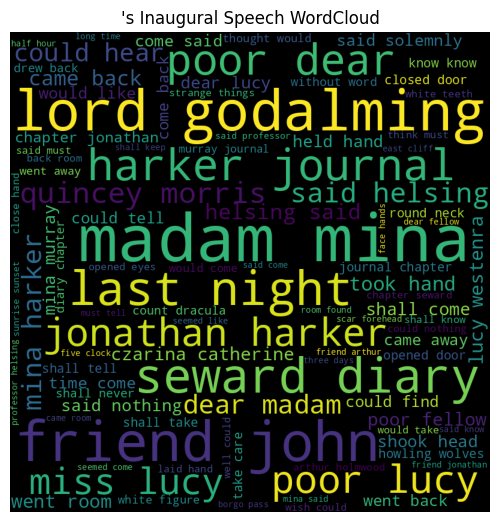

In [ ]:
# Create YOUR wordcloud here

tokens = word_tokenize(realText)
clean_tokens = [token.lower() for token in tokens if token not in string.punctuation and token.lower() not in stop  and len(token) >= 4]

bigram_list = list(bigrams(clean_tokens))

clean_bigrams = [' '.join(bigram) for bigram in bigram_list]

bi_counter = Counter(clean_bigrams)

wordcloud = WordCloud(width=800,height=800, min_font_size=14).generate_from_frequencies(bi_counter)

plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("'s Inaugural Speech WordCloud")
plt.show()


In [ ]:
# Imports and mounting required for my code

from PIL import Image
import numpy as np

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


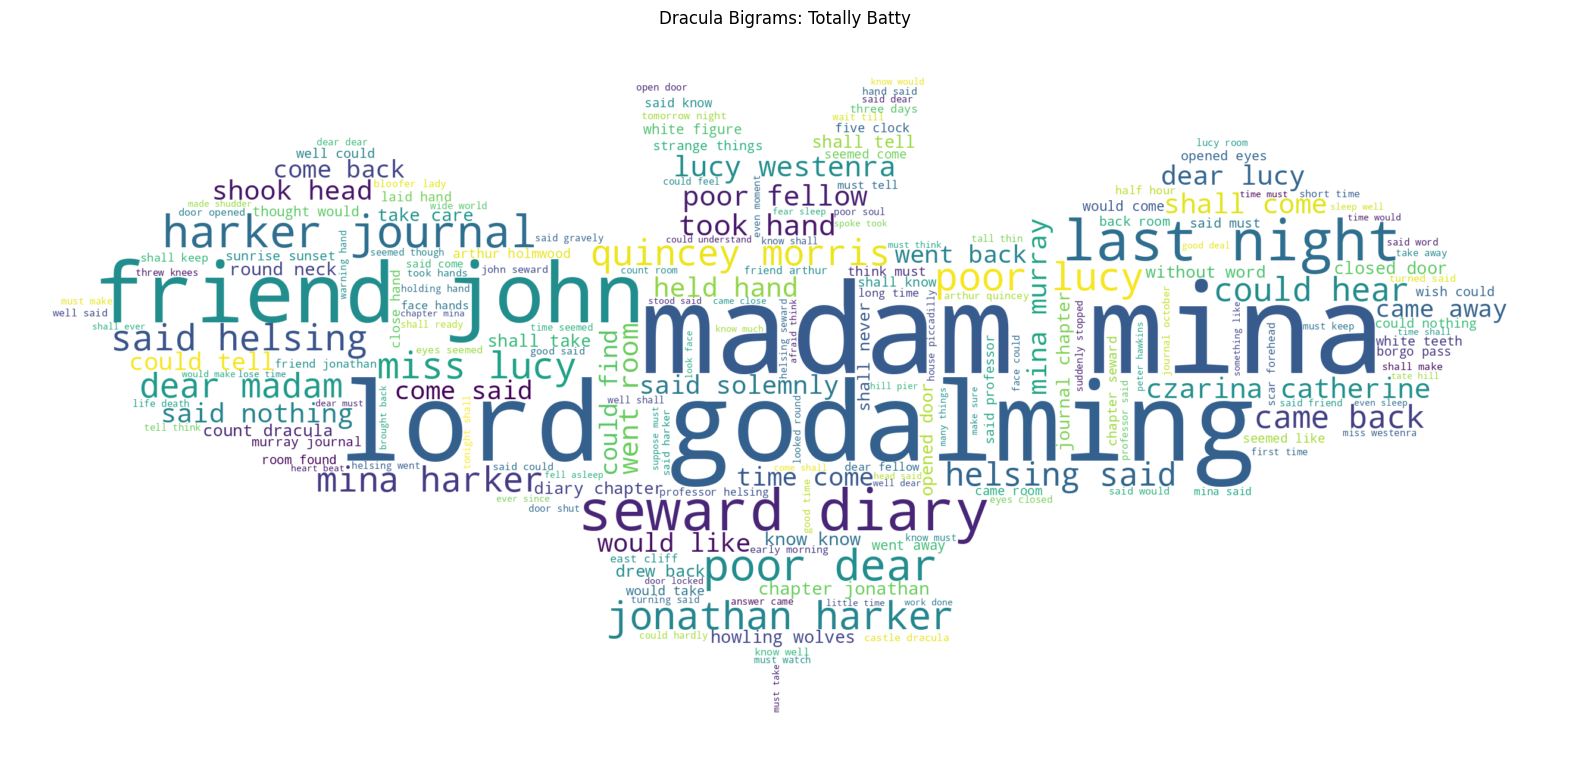

In [ ]:

# Accessing data from Google Drive
# Make sure the following string points to where you saved the bat picture

#file = '/content/drive/My Drive/bat.jpg'
#NJW edit
file = '/content/drive/My Drive/Colab Notebooks/CSC206/Data/bat.jpg'


# Creating a mask. It works best if you have a black and white image
# and we create the mask - where we are going to write in the areas that
# are black, and not write where it's white

bat_mask = np.array(Image.open(file))

wc = WordCloud(background_color="white", mask=bat_mask,
               contour_width=3, contour_color='white')

# Generate a wordcloud from a dictionary or counter called
# wordCounts

wc.generate_from_frequencies(bi_counter)


# show
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation='bilinear')
plt.title('Dracula Bigrams: Totally Batty')
plt.axis("off")
plt.show()